In [208]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, linear_model

In [2]:
wdir = '/data1/users/jvogel/Allen_Human_Brain_Atlas/'
xp = pandas.read_csv(os.path.join(wdir,'whole_hippocampus_xp_allsubs_cleaned_labeled.csv'))

In [7]:
xp.shape

(58698, 124)

In [8]:
xp.head()

,10021_lab_1.0_samp_524,10021_lab_1.0_samp_525,10021_lab_1.0_samp_527,10021_lab_1.0_samp_528,10021_lab_1.0_samp_531,10021_lab_1.0_samp_532,10021_lab_1.0_samp_533,10021_lab_1.0_samp_534,10021_lab_1.0_samp_544,10021_lab_1.0_samp_545,...,9861_lab_1.0_samp_787,9861_lab_1.0_samp_788,9861_lab_1.0_samp_790,9861_lab_1.0_samp_792,9861_lab_1.0_samp_796,9861_lab_1.0_samp_797,9861_lab_1.0_samp_798,9861_lab_1.0_samp_804,9861_lab_1.0_samp_805,9861_lab_1.0_samp_806
0,0.480406,0.660119,-0.950707,-1.794701,-0.275478,0.515764,0.981695,-0.833769,-0.050159,-0.204280,...,0.356873,-0.854386,-1.298184,-0.314338,-1.405429,-0.986159,-0.539705,-0.185890,-0.760153,-1.156494
1,-0.281919,-0.281919,-0.146346,-0.122736,-0.281919,-0.281919,-0.281919,-0.281919,-0.079232,-0.281919,...,-0.041418,-0.279874,-0.322989,-0.076614,-0.307653,-0.166291,-0.142514,-0.311726,0.071945,-0.190493
2,-0.337035,-0.274058,-0.128501,-0.064542,-0.337035,-0.337035,-0.337035,-0.337035,-0.172031,-0.337035,...,0.008473,-0.088185,-0.329613,0.025157,-0.225742,-0.055409,-0.008256,-0.348750,-0.149676,0.042965
3,-0.074482,-0.354070,0.214679,0.156800,0.026163,0.796322,0.477698,-0.403528,-0.358875,0.338218,...,0.443062,0.615837,1.837306,-0.399442,1.045389,1.043883,0.028797,0.785455,-0.474766,0.043116
4,-0.048502,-0.070200,0.062610,0.046749,0.430726,0.623134,0.255087,-0.287510,-0.061610,0.273906,...,1.228126,1.111220,1.301074,0.367464,0.794877,0.685466,1.286411,0.424040,0.685054,1.715385


In [10]:
all([x for x in xp.values.transpose().flat == xp.transpose().values.flat])

True

In [236]:
xp.values.T.shape

(124, 58698)

In [3]:
pca = PCA(n_components=20)
xp_pca = pca.fit(xp.values.T)

In [15]:
xp_pca.components_.shape

(20, 58698)

In [16]:
(xp_pca.fit_transform(xp.values.T)).shape

(124, 20)

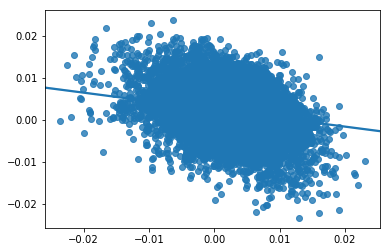

In [17]:
plt.close()
sns.regplot(xp_pca.components_[0,:],xp_pca.components_[1,:])
plt.show()

In [153]:
len(xp_pca.components_[0,:])

58698

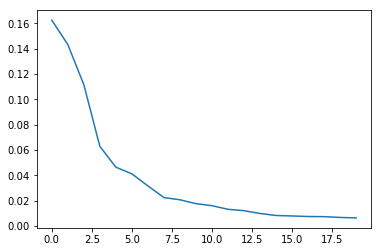

In [18]:
plt.close()
plt.plot(xp_pca.explained_variance_ratio_)
plt.show()

In [19]:
xp_pca.explained_variance_ratio_.sum()

0.75656525890049353

In [5]:
transf = xp_pca.transform(xp.T)

In [6]:
tsne = TSNE(n_components=2)
xp_tsne = tsne.fit_transform(transf)

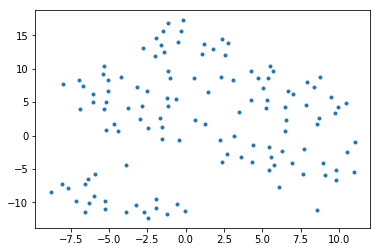

In [181]:
plt.close()
plt.plot(xp_tsne[:,0],xp_tsne[:,1],'.')
plt.show()

In [7]:
df = pandas.read_csv(os.path.join(wdir,'whole_hippocampus_hit_coordinates_cleaned_all_c_labs.csv'))

In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sub', 'label', 'x', 'y', 'z',
       'slab_type', 'structure_acronym', 'structure_name', 'cluster_label',
       'bilateral_structure_name', 'clean_cluster_label',
       'hip_axis_loc_posterior_high', '2_c_solution', '3_c_solution',
       '4_c_solution', '5_c_solution', '6_c_solution', '7_c_solution',
       '8_c_solution', '9_c_solution', '10_c_solution', '11_c_solution',
       '12_c_solution'],
      dtype='object')

In [9]:
df = df.loc[[x for x in df.index if pandas.notnull(df.loc[x,'2_c_solution'])]]

In [10]:
df.drop(df.index[0],inplace=True)

In [11]:
pltdf = pandas.DataFrame(xp_tsne,columns = ['dim1','dim2'])
pltdf.loc[:,'structure_name'] = df.bilateral_structure_name.values
pltdf.loc[:,'axis_location'] = df.hip_axis_loc_posterior_high.values

pltdf.head()

,dim1,dim2,structure_name,axis_location
0,-7.831390,14.767763,dentate gyrus,13.0
1,12.311459,7.180545,CA4 field,13.0
2,14.827580,3.802934,CA1 field,12.0
3,12.971540,2.892677,subiculum,11.0
4,14.019451,9.727917,dentate gyrus,27.0


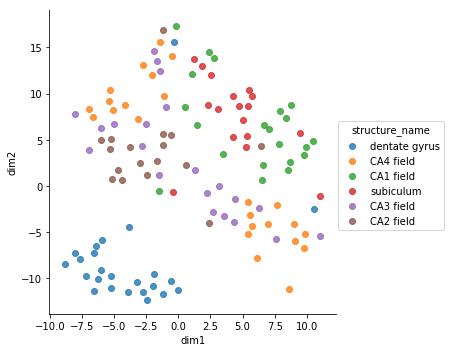

In [185]:
plt.close()
sns.lmplot(x = 'dim1', y = 'dim2', hue='structure_name',data=pltdf, fit_reg=False)
plt.show()

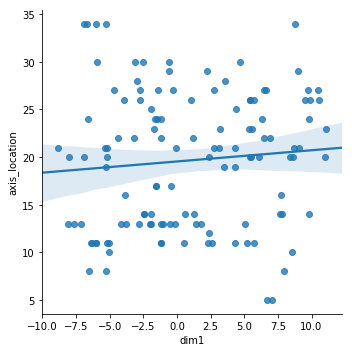

In [187]:
plt.close()
sns.lmplot('dim1','axis_location', data=pltdf)
plt.show()

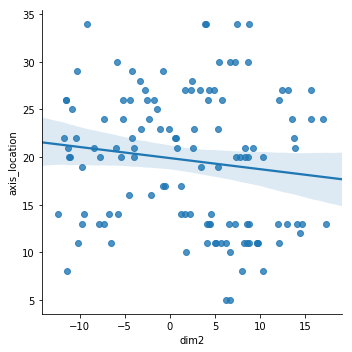

In [190]:
plt.close()
sns.lmplot('dim2','axis_location', data=pltdf)
plt.show()

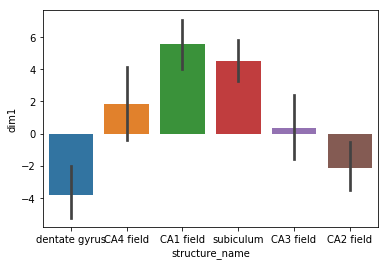

In [188]:
plt.close()
sns.barplot('structure_name','dim1', data=pltdf)
plt.show()

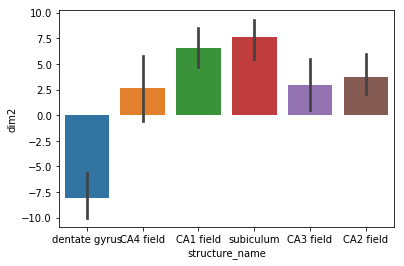

In [189]:
plt.close()
sns.barplot('structure_name','dim2', data=pltdf)
plt.show()

In [81]:
normy = (pltdf.axis_location / pltdf.axis_location.max()) * 255

In [86]:
pltdf.loc[:,'normed_loc'] = ['#%02x%02x%02x'%(0,0,int(x)) for x in normy]

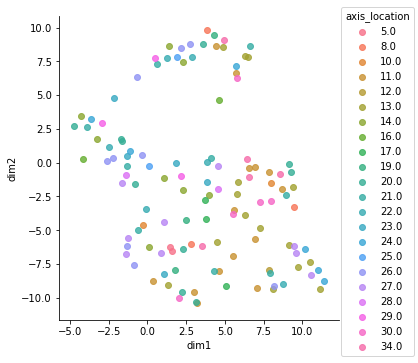

In [147]:
plt.close()
sns.lmplot(x = 'dim1', y = 'dim2', hue='axis_location',data=pltdf, fit_reg=False)
plt.show()

In [89]:
rxp = pandas.read_csv(os.path.join(wdir,'whole_hippocampus_xp_allsubs_cleaned_regr_subfield.csv'))

In [99]:
rxp.drop(rxp.columns[:7],axis=1,inplace=True)

In [100]:
pca = PCA(n_components=20)
rxp_pca = pca.fit(rxp.values)


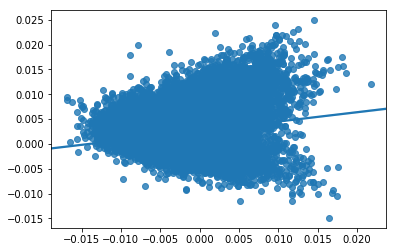

In [101]:
plt.close()
sns.regplot(rxp_pca.components_[0,:],rxp_pca.components_[1,:])
plt.show()

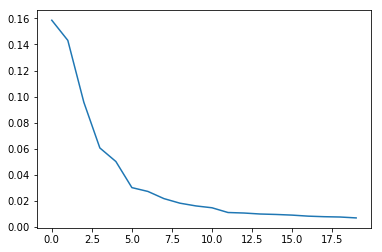

In [103]:
plt.close()
plt.plot(rxp_pca.explained_variance_ratio_)
plt.show()

In [105]:
rxp_pca.explained_variance_ratio_.sum()

0.71625504351949909

In [106]:
rtransf = rxp_pca.transform(rxp)
tsne = TSNE(n_components=2)
rxp_tsne = tsne.fit_transform(rtransf)

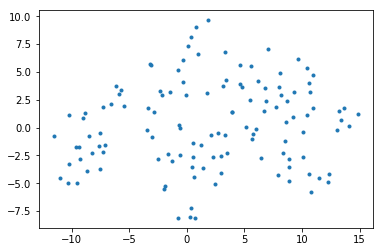

In [107]:
plt.close()
plt.plot(rxp_tsne[:,0],rxp_tsne[:,1],'.')
plt.show()

In [108]:
rpltdf = pandas.DataFrame(rxp_tsne,columns = ['dim1','dim2'])
rpltdf.loc[:,'structure_name'] = df.bilateral_structure_name.values
rpltdf.loc[:,'axis_location'] = df.hip_axis_loc_posterior_high.values

rpltdf.head()

,dim1,dim2,structure_name,axis_location
0,-8.884249,1.299358,dentate gyrus,13.0
1,-9.644856,-1.783187,CA4 field,13.0
2,-7.646881,-1.701110,CA1 field,12.0
3,-7.086282,-1.570627,subiculum,11.0
4,-9.498507,-4.942227,dentate gyrus,27.0


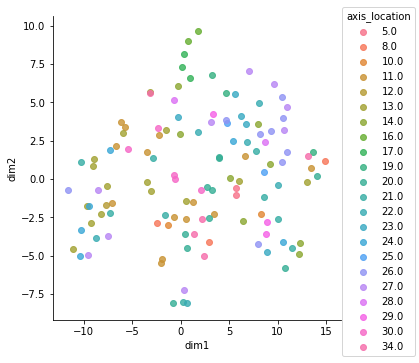

In [110]:
plt.close()
sns.lmplot('dim1','dim2',hue='axis_location',data = rpltdf, fit_reg=False)
plt.show()

In [116]:
qs = [0.2, 0.4, 0.6, 0.8]
for q in qs:
    print(rpltdf.axis_location.quantile(q=q))

13.0
17.400000000000006
22.0
26.0


In [122]:
rpltdf.axis_location[0]

13.0

In [124]:
for i in rpltdf.index:
    x = rpltdf.loc[i,'axis_location']
    if x < 13:
        rpltdf.loc[i,'ax_bin'] = 1
    elif x < 17.4:
        rpltdf.loc[i,'ax_bin'] = 2
    elif x < 22:
        rpltdf.loc[i,'ax_bin'] = 3
    elif x < 26:
        rpltdf.loc[i,'ax_bin'] = 4
    else:
        rpltdf.loc[i,'ax_bin'] = 5
        

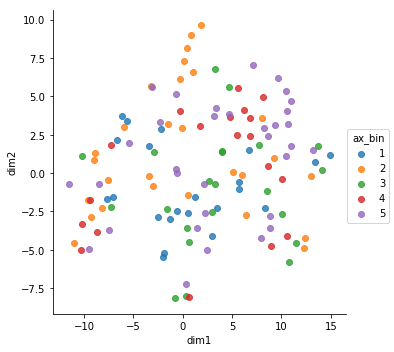

In [125]:
plt.close()
sns.lmplot('dim1','dim2',hue='ax_bin',data = rpltdf, fit_reg=False)
plt.show()

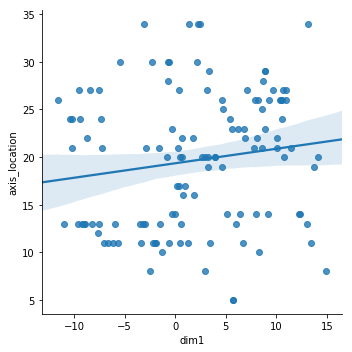

In [225]:
plt.close()
sns.lmplot('dim1','axis_location', data=rpltdf)
plt.show()

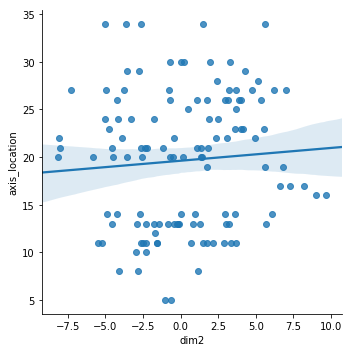

In [226]:
plt.close()
sns.lmplot('dim2','axis_location', data=rpltdf)
plt.show()

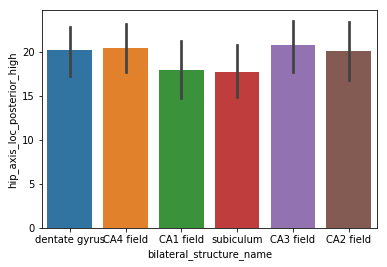

In [128]:
plt.close()
sns.barplot(x='bilateral_structure_name', y = 'hip_axis_loc_posterior_high', data = df)
plt.show()

In [19]:
from sklearn import linear_model

In [241]:
xp.values.T.shape

(124, 58698)

In [12]:
del(xp_pca)
del(xp_tsne)

In [15]:
pca_all = PCA()
#p_pca_all = pca_all.fit_transform(xp.values)
#print(xp_pca_all.shape)
xp_pca_all2 = pca_all.fit_transform(xp.values.T)
print(xp_pca_all2.shape)

(124, 124)


In [23]:
print(xp.values.T.shape)

(124, 58698)


In [16]:
xp_pca_mod = pca_all.fit(xp.values.T)

In [17]:
xp_pca_mod.components_.shape

(124, 58698)

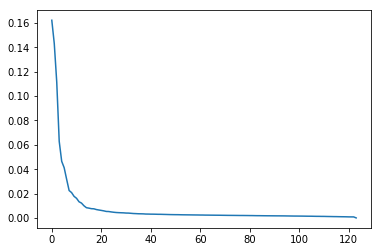

In [24]:
plt.close()
plt.plot(xp_pca_mod.explained_variance_ratio_[:20])
plt.show()

In [5]:
xp_pca_all.components_.shape

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

In [55]:
xp_lasso = linear_model.LassoCV().fit(xp_pca_all2, pltdf.axis_location)

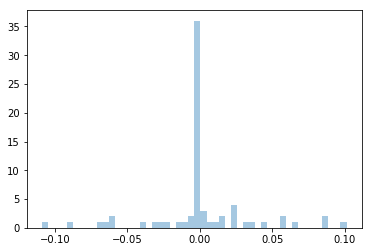

In [39]:
plt.close()
sns.distplot(xp_lasso.coef_.tolist()[:70],kde=False)
plt.show()

In [33]:
list(zip(range(len(xp_lasso.coef_.tolist())),xp_lasso.coef_.tolist()))

[(0, 0.010844379512232495),
 (1, 0.0),
 (2, -0.015616288617753682),
 (3, 0.022396083682050223),
 (4, -0.026031340987127366),
 (5, 0.0027288929960055095),
 (6, 0.057233156698585724),
 (7, -0.004425947963508982),
 (8, -0.023413371744325565),
 (9, 0.055400518283276405),
 (10, 0.0454141849005999),
 (11, -0.06699380741915256),
 (12, -0.06608307683913488),
 (13, 0.025052609416470042),
 (14, 0.08761596961421954),
 (15, -0.06101263842136564),
 (16, -0.108728743113422),
 (17, 0.10137217501175382),
 (18, 0.03764243097536075),
 (19, -0.040147190386962794),
 (20, -0.01015978152109423),
 (21, 0.0024774450696295035),
 (22, 0.0),
 (23, 0.06443423577252134),
 (24, 0.0),
 (25, -0.031531278348216445),
 (26, -0.0901101643041917),
 (27, 0.0),
 (28, 0.0),
 (29, -0.0),
 (30, 0.0),
 (31, 0.0),
 (32, -0.0),
 (33, 0.022768022053241025),
 (34, -0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.015591647201619107),
 (38, 0.0),
 (39, -0.0),
 (40, 0.0),
 (41, 0.02452586896580873),
 (42, -0.058748835534708624),
 (43, 0.0),
 (4

In [227]:
[x for x in range(len(xp_lasso.coef_)) if abs(xp_lasso.coef_[x]) == max(abs(xp_lasso.coef_))]

[16]

In [56]:
xp_lasso.score(xp_pca_all2, pltdf.axis_location)

0.82115965240721012

In [255]:
len([x for x in xp_lasso.coef_ if x != 0])

35

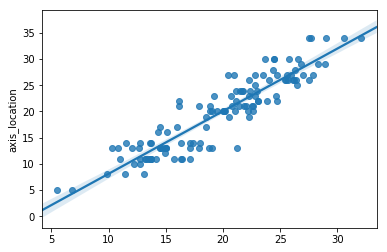

In [258]:
plt.close()
sns.regplot(xp_lasso.predict(xp_pca_all2), pltdf.axis_location)
plt.show()

In [30]:
xp.values.T.shape # raw data (Sample x Gene)

(124, 58698)

In [27]:
xp_pca_mod.components_.shape # component weights (Component x weight)   P

(124, 58698)

In [28]:
xp_pca_all2.shape # transformed data (Sample x component)

(124, 124)

In [31]:
xp_lasso.coef_.shape # regression-weight     A-hat

(124,)

In [41]:
#ATTEMPT1
jake_final_weights = np.dot(xp_pca_all2,xp_lasso.coef_)
jake_final_weights.shape

(124,)

In [36]:
jake_final_vals = np.dot(xp.values,jake_final_weights)
jake_final_vals.shape

(58698,)

In [ ]:
#ATTEMPT2 (ALEX)

In [42]:
alex_final_weights = np.dot(xp_pca_mod.components_.T,xp_lasso.coef_)
alex_final_weights.shape

(58698,)

In [47]:
aslopes = pandas.Series(alex_final_weights)

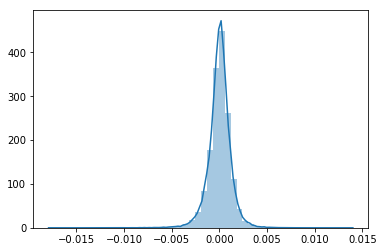

In [191]:
plt.close()
sns.distplot(aslopes)
plt.show()

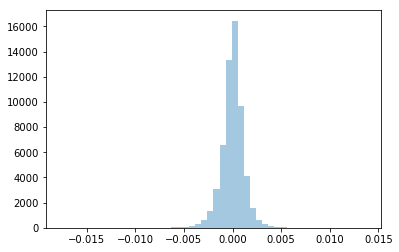

In [190]:
plt.close()
sns.distplot(aslopes,kde=False)
plt.show()

In [53]:
aslopes.sort_values(ascending=False).head()

6582     0.013694
51664    0.011138
32888    0.010618
32889    0.010161
16389    0.009468
dtype: float64

In [61]:
round(len(aslopes)*0.05)

2935

In [97]:
posterior = aslopes.sort_values(ascending=False)[:round(len(aslopes)*0.05)].index
anterior = aslopes.sort_values(ascending=True)[:round(len(aslopes)*0.05)].index

In [189]:
len(aslopes[aslopes>0.005])

92

In [65]:
gene_info = pandas.read_csv('/data1/users/jvogel/Allen_Human_Brain_Atlas/normalized_microarray_donor10021/Probes.csv')

In [77]:
jnk = gene_info.loc[posterior][['gene_id','gene_name']]

In [92]:
jnk.to_csv(os.path.join(wdir,'posterior_gene_ids.csv'),encoding='utf-8')
jnk['gene_name'].to_csv(os.path.join(wdir,'posterior_gene_names.csv'),index=False)

In [98]:
jnk = gene_info.loc[anterior][['gene_id','gene_name']]
jnk.to_csv(os.path.join(wdir,'anterior_gene_ids.csv'),encoding='utf-8')
jnk['gene_name'].to_csv(os.path.join(wdir,'anterior_gene_names.csv'),index=False)

In [181]:
[x for x in gene_info['gene_symbol'] if 'FUS' in x]

['FUS', 'FUS', 'FUSIP1', 'FUSIP1', 'FUSIP1', 'FUSIP1', 'FUSIP1']

In [183]:
[x for x in gene_info.index if 'FUS' in gene_info['gene_symbol'][x]]

[1788, 1789, 10096, 10097, 10098, 10099, 10100]

In [117]:
f_srch = aslopes.sort_values(ascending=True).index

In [125]:
a_srch = aslopes.sort_values(ascending=False).index

In [185]:
[x for x in range(len(aslopes)) if f_srch[x] == 1789]

[38813]

In [126]:
[x for x in range(len(aslopes)) if a_srch[x] == 51325]

[9478]

In [89]:
jnk.loc[jnk.index[2262]]

gene_id                                     60316
gene_name    Ca++-dependent secretion activator 2
Name: 31892, dtype: object

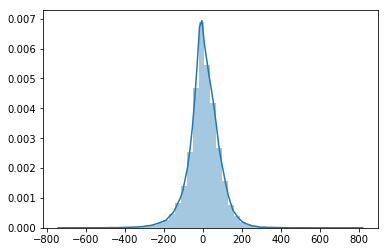

In [52]:
plt.close()
sns.distplot(jake_final_vals)
plt.show()

In [198]:
# SANITY CHECK ANALYSIS
p_chk = aslopes.sort_values(ascending=False)[:100].index
a_chk = aslopes.sort_values(ascending=False)[-100:].index

In [206]:
# For each sample, get average expression for top 100 genes for both anterior and posterior direction (separately)
pchk_vals = []
for sample in range(xp.shape[-1]):
    to_avg = []
    for gene in p_chk:
        to_avg.append(xp.values[gene,sample])
    pchk_vals.append(np.mean(to_avg))

achk_vals = []
for sample in range(xp.shape[-1]):
    to_avg = []
    for gene in a_chk:
        to_avg.append(xp.values[gene,sample])
    achk_vals.append(np.mean(to_avg))

In [241]:
jnk = pandas.Series(xp_pca_mod.components_[17],index=range(len(xp_pca_mod.components_[17])))
alex18 = jnk.sort_values()[-100:].index

In [243]:
a18_vals = []
for sample in range(xp.shape[-1]):
    to_avg = []
    for gene in alex18:
        to_avg.append(xp.values[gene,sample])
    a18_vals.append(np.mean(to_avg))

In [220]:
pltdf.axis_location.shape

(124,)

In [ ]:
pchk

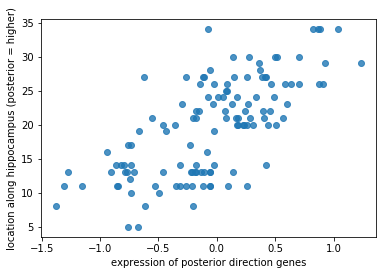

(0.69396773074438167, 4.0537001387915866e-19)

In [248]:
plt.close()
sns.regplot(x=np.array(pchk_vals), y=pltdf.axis_location.astype(float), fit_reg=None)
plt.xlabel('expression of posterior direction genes')
plt.ylabel('location along hippocampus (posterior = higher)')
plt.show()
stats.pearsonr(pchk_vals,pltdf.axis_location)

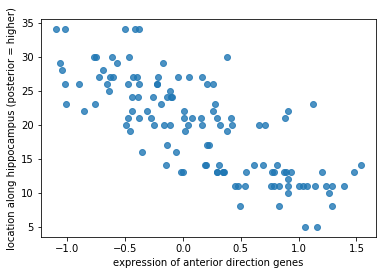

(-0.77547375911759553, 3.9946085744968867e-26)

In [247]:
plt.close()
sns.regplot(x=np.array(achk_vals), y=pltdf.axis_location.astype(float),fit_reg=None)
plt.xlabel('expression of anterior direction genes')
plt.ylabel('location along hippocampus (posterior = higher)')
plt.show()
stats.pearsonr(achk_vals,pltdf.axis_location)

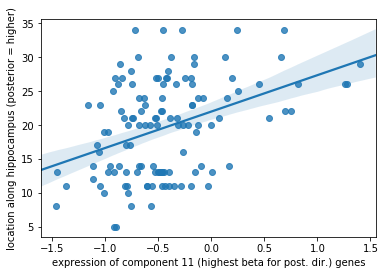

(0.39753885809112216, 4.8344917226719465e-06)

In [244]:
plt.close()
sns.regplot(x=np.array(a18_vals), y=pltdf.axis_location.astype(float))
plt.xlabel('expression of component 11 (highest beta for post. dir.) genes')
plt.ylabel('location along hippocampus (posterior = higher)')
plt.show()
stats.pearsonr(a18_vals,pltdf.axis_location)

# TO DO
* Run GSEA with the sorted gene list
* Look at gene-gene covariance networks related to the expression profiles

In [246]:
gene_info.loc[p_chk]

,probe_id,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
6582,1050553,A_23_P130333,7233,TTR,transthyretin,7276.0,18
51664,1064147,A_32_P11262,1007103,A_32_P11262,AGILENT probe A_32_P11262 (non-RefSeq),NaN,NaN
32888,1023031,A_32_P174978,90297,NPNT,nephronectin,255743.0,4
32889,1023030,A_23_P253896,90297,NPNT,nephronectin,255743.0,4
16389,1039873,CUST_14024_PI416261804,41000,HHIP,hedgehog interacting protein,64399.0,4
16390,1039872,A_23_P167129,41000,HHIP,hedgehog interacting protein,64399.0,4
8892,1048608,A_32_P53524,9287,NTN1,netrin 1,9423.0,17
43820,1010982,CUST_2919_PI416261804,165295,RP11-291L15.2,HHIP antisense RNA 1 (non-protein coding),646576.0,4
8893,1048607,A_23_P15478,9287,NTN1,netrin 1,9423.0,17
15982,1041274,A_23_P318904,35536,SERTAD4,SERTA domain containing 4,56256.0,1


In [245]:
p_chk

Int64Index([ 6582, 51664, 32888, 32889, 16389, 16390,  8892, 43820,  8893,
            15982, 57136, 44164,  6581, 14183,  2864, 43592, 30221, 43260,
            47036, 45127, 17633, 43717, 39409, 27030, 46463,   344, 26238,
            53030,  8129, 24515, 42532, 16379, 14810, 48072, 16378, 57805,
            22347, 14181, 56821, 38407, 26237, 26236, 36532, 24514, 29726,
            57744, 30220, 47792,  4422, 43501, 43831,  5008, 22348,  2451,
            53093,   203, 44200,  5824,  2438, 49118,  2436, 15383,  2439,
             5009, 37558, 12942, 30441,  8056, 15981,   426,  1320, 14129,
            42992, 18974, 24702, 50161, 29959, 47338, 22547, 17388, 31581,
             2455, 23898, 12941, 17115, 15902, 29412, 44201, 16380, 17772,
             2504, 17114, 23780, 53308,  8964, 33951, 47638, 30442, 27029,
             2461],
           dtype='int64')

In [102]:
from sklearn.model_selection import train_test_split

In [77]:
train_test_split?

In [103]:
tr, te = train_test_split(pandas.DataFrame(xp_pca_all2),test_size=0.3,stratify=df['sub'])

In [104]:
jnk = linear_model.LassoCV().fit(tr, pltdf.loc[tr.index,'axis_location'])
jnk.score(te,pltdf.loc[te.index,'axis_location'])

0.50890686740275992

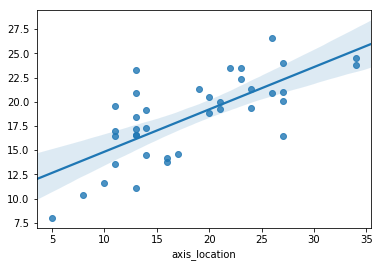

In [106]:
plt.close()
sns.regplot(pltdf.loc[te.index,'axis_location'],jnk.predict(te))
plt.show()

In [21]:
mn_cntr_xp = (xp.values - xp.values.mean())

In [22]:
U, S, V = np.linalg.svd(mn_cntr_xp)

MemoryError: 

In [103]:
xp_lasso.coef_.shape

(124,)

In [105]:
G = U*xp_lasso.coef_

In [107]:
G.shape

(124, 124)

In [108]:
xp_pca_all2.shape

(124, 124)

In [110]:
V.shape

(124, 124)

In [248]:
pltdf.loc[:,'comp0'] = xp_pca_all2[:,0] 
pltdf.loc[:,'comp1'] = xp_pca_all2[:,1]
pltdf.loc[:,'comp2'] = xp_pca_all2[:,2]

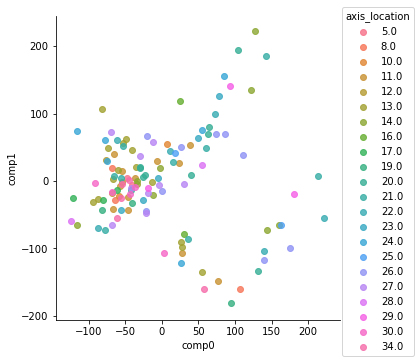

In [252]:
plt.close()
sns.lmplot('comp0','comp1',hue='axis_location',data=pltdf, fit_reg=False)
plt.show()

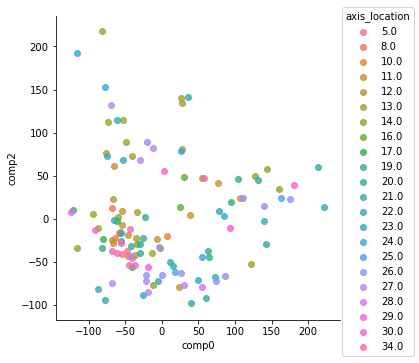

In [251]:
plt.close()
sns.lmplot('comp0','comp2',hue='axis_location',data=pltdf, fit_reg=False)
plt.show()

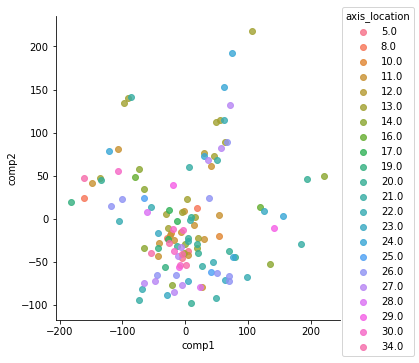

In [253]:
plt.close()
sns.lmplot('comp1','comp2',hue='axis_location',data=pltdf, fit_reg=False)
plt.show()

In [41]:
scl_xp_pca_all2 = pca_all.fit_transform(StandardScaler().fit_transform(xp.values.T))

In [42]:
scl_xp_lasso = linear_model.LassoCV().fit(scl_xp_pca_all2, pltdf.axis_location)

In [44]:
scl_xp_lasso.score(xp_pca_all2, pltdf.axis_location)

-0.0040433306318741202

In [ ]:
fit_transform(xp.values.T)

### Not adjusted for subject

In [49]:
oxp = pandas.read_csv('/data1/users/jvogel/Allen_Human_Brain_Atlas/whole_hippocampus_xp_allsubs.csv')

In [50]:
oxp.shape

(58692, 148)

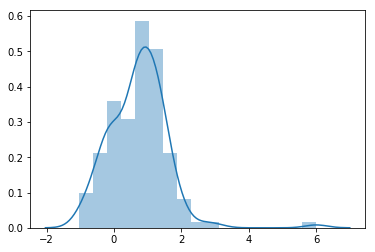

In [51]:
plt.close()
sns.distplot(oxp.values.T[:,6])
plt.show()

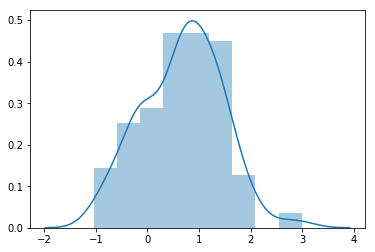

In [48]:
plt.close()
sns.distplot(xp.values.T[:,6])
plt.show()

In [54]:
lxp = pandas.read_csv('/data1/users/jvogel/Allen_Human_Brain_Atlas/whole_hippocampus_xp_allsubs_cleaned_labeled.csv')

In [65]:
df['sub'].value_counts()

9861     54
10021    30
15697    15
14380    12
15496     7
12876     6
Name: sub, dtype: int64

In [ ]:
def PCA_LR_pipeline(in_mtx, y, pca = PCA(random_state=123), 
                    clf = linear_model.LassoCV(random_state = 123), 
                    cv_strategy = None, cv = 10, test_gene_num = 100, illustrative = True,
                   ):
    
    if type(in_mtx) == pandas.core.frame.DataFrame:
        in_mtx = in_mtx.values
    print('running PCA')
    dat_pca = pca.fit(in_mtx)
    print('transforming data')
    pca_tfm = dat_pca.transform(in_mtx)
    final_outputs = {'pca_object': dat_pca}
    
    if len(y) != pca_tfm.shape[-1]:
        raise ValueError('length of y-axis of transformed item must match the length of y')
    
    print('performing model cross-validation')
    if hasattr(cv_strategy, 'get_n_splits'):
        folds = cv_strategy.get_n_splits(pca_tfm)
        #scores = model_selection.cross_val_score(clf, pca_tfm, y=y, groups=folds, cv=cv)
        predicted = model_selection.cross_val_predict(clf, pca_tfm, y=y, groups=folds, cv=cv)
        score = stats.pearsonr(predicted, y)[0]**2
    elif type(cv_strategy) != type(None):
        #scores = model_selection.cross_val_score(clf, pca_tfm, y=y, cv=cv)
        predicted = model_selection.cross_val_predict(clf, pca_tfm, y=y, cv=cv)
        score = stats.pearsonr(predicted, y)[0]**2
    else:
        score = None
    if type(score) != type(None):
        if illustrative:
            plt.close()
            sns.regplot(predicted, y, fit_reg=False)
            plt.xlabel('CV model predicted position along axis')
            plt.ylabel('Actual position along axis')
            plt.show()
        print('model cv score: r2 = ',score)
        final_outputs.update({'CV_scores': score})
    else:
        print('no valid cross-validation method specified')
    
    print('running final model')
    mod = clf.fit(pca_tfm, y)
    if not hasattr(mod,'coef_'):
        raise IOError('right now, this pipeline can only accept clf objects with a coef_ attribute')
    final_outputs.update({'final_model': mod})
    scr = mod.score(pca_tfm, y)
    if illustrative:
        print('final model fit r2 = ',scr)
    
    f_betas = back_transform(dat_pca, mod)
    final_outputs.update({'betas': f_betas})
    
    gene_selections = sanity_check(in_mtx, y, f_betas, test_gene_num, illustrative)
    final_outputs.update({'gene_selections': gene_selections})
    
    return final_outputs
    
def back_transform(pca_obj, clf_obj):
    return np.dot(pca_obj.components_.T,clf_obj.coef_)

def sanity_check(in_mtx, y, betas, test_gene_num, illustrative):
    
    print('running sanity_check')
    betas = pandas.Series(betas)   
    p_chk = betas.sort_values(ascending=False)[:test_gene_num].index
    a_chk = betas.sort_values(ascending=False)[-test_gene_num:].index
    
    pchk_vals = []
    for sample in range(in_mtx.shape[0]):
        to_avg = []
        for gene in p_chk:
            to_avg.append(in_mtx[sample,gene])
        pchk_vals.append(np.mean(to_avg))

    achk_vals = []
    for sample in range(in_mtx.shape[0]):
        to_avg = []
        for gene in a_chk:
            to_avg.append(in_mtx[sample,gene])
        achk_vals.append(np.mean(to_avg))
    
    pr,pp = stats.pearsonr(pchk_vals, y)
    if illustrative:
        plt.close()
        sns.regplot(x=np.array(pchk_vals), y=y, fit_reg=None)
        plt.xlabel('expression of posterior direction genes')
        plt.ylabel('location along hippocampus (posterior = higher)')
        plt.show()
    print('posterior %s genes vs. y:  r2 = %s, p = %s \n\n'%(test_gene_num, pr**2, pp))
    
    ar,ap = stats.pearsonr(achk_vals, y)
    if illustrative:
        plt.close()
        sns.regplot(x=np.array(achk_vals), y=y, fit_reg=None)
        plt.xlabel('expression of anterior direction genes')
        plt.ylabel('location along hippocampus (posterior = higher)')
        plt.show()
    print('anterior %s genes vs. y:  r2 = %s, p = %s \n\n'%(test_gene_num, ar**2, ap))
    
    outputs = {'posterior_genes': p_chk, 'anterior_genes': a_chk}
    
    return outputs



In [ ]:
pcalr_out = PCA_LR_pipeline(xp.loc[xp.index[:-6]].values.T, 
                            df.hip_axis_loc_posterior_high, 
                            cv_strategy='score', illustrative=True)

In [ ]:
shtz = sorted(glob('normalized_microarray_donor*/MExp_all_genes_ctr_for_donor*'))
holder = []
for sht in shtz:
    holder.append(pandas.read_csv(sht, index_col=0))
bigdf = pandas.concat(holder,axis=1)
for sht in shtz:
    did = sht.split('donor')[1].split('/')[0]
    jnk = pandas.read_csv(sht,index_col=0)
    gcx_results.loc[gcx_results.index[cnt]:gcx_results.index[(cnt+(jnk.shape[-1]-1))],'donor'] = [did]*jnk.shape[-1]
    gcx_results.loc[gcx_results.index[cnt]:gcx_results.index[(cnt+(jnk.shape[-1]-1))],'sample'] = jnk.columns
    cnt += jnk.shape[-1]
    print('finished',sht)

In [ ]:
refvec = refvec = pcalr_out['betas'] 
for samp in range(bigdf.shape[-1]):
    svec = bigdf.values[:,samp]
    r,p = stats.pearsonr(svec,refvec)
    #print('sample %s, r = %s, dist = %s'%(samp, r, y.iloc[samp]))
    gcx_vec.append(r)
